c:\Users\Lenovo\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Lenovo\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


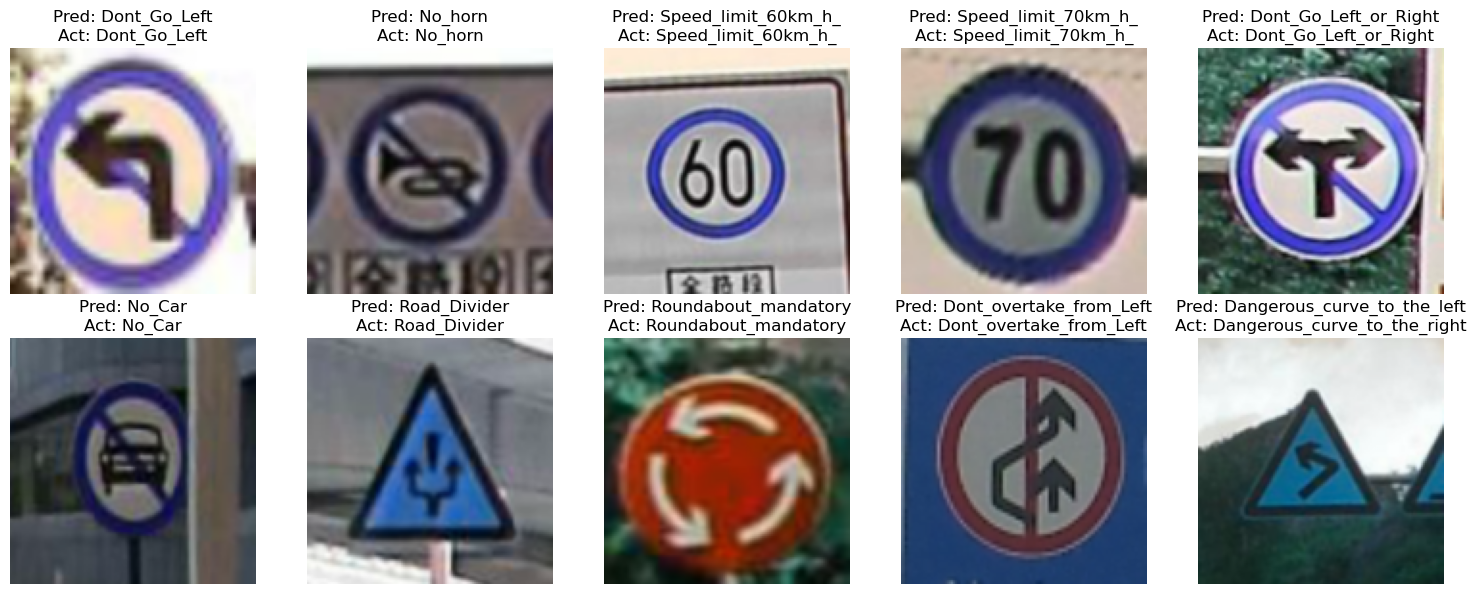

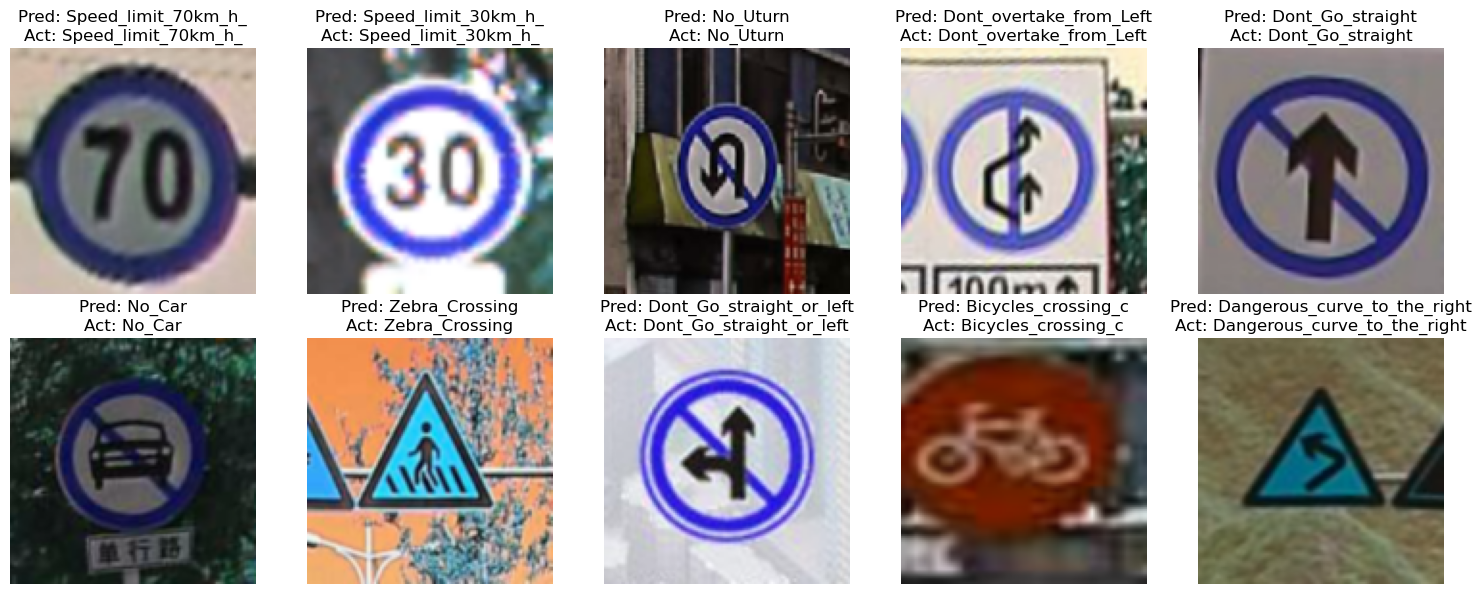

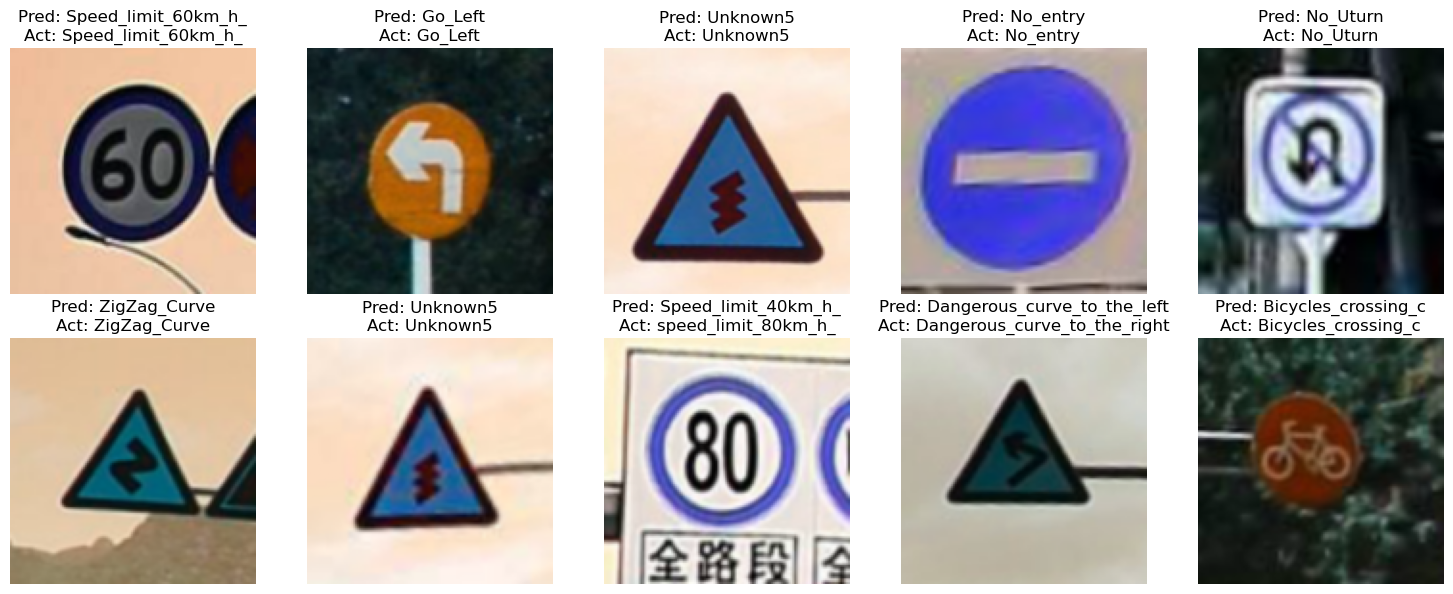

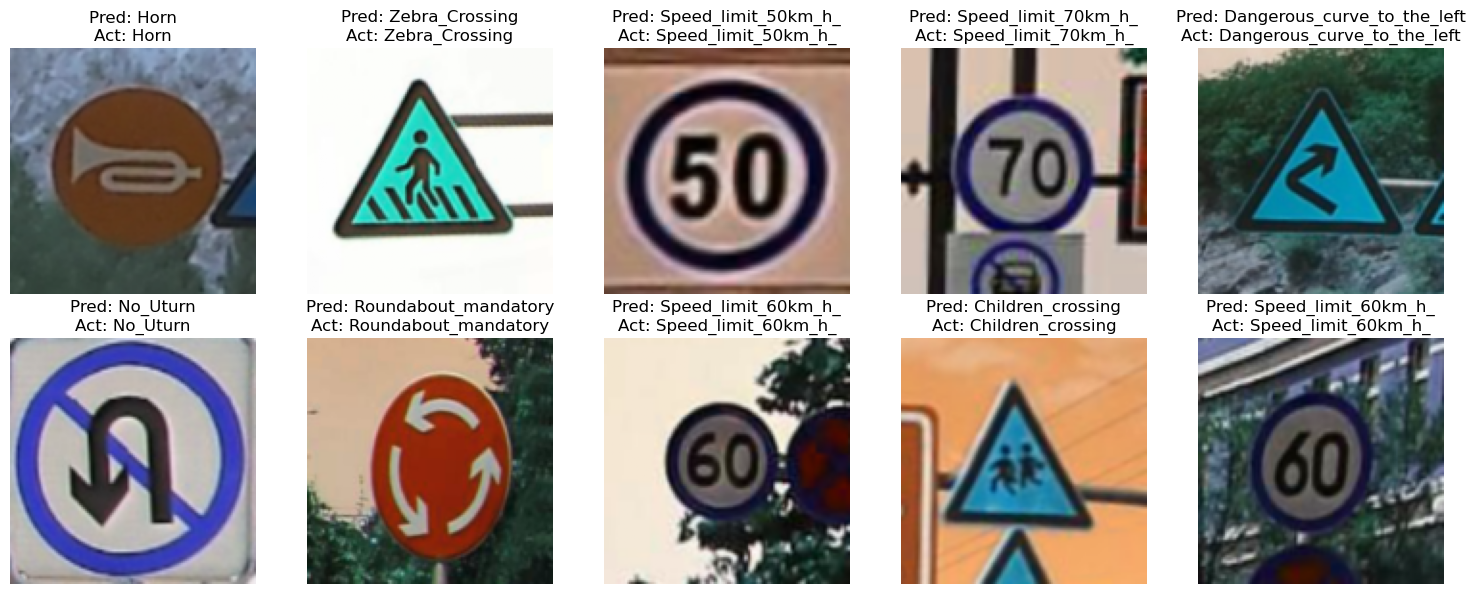

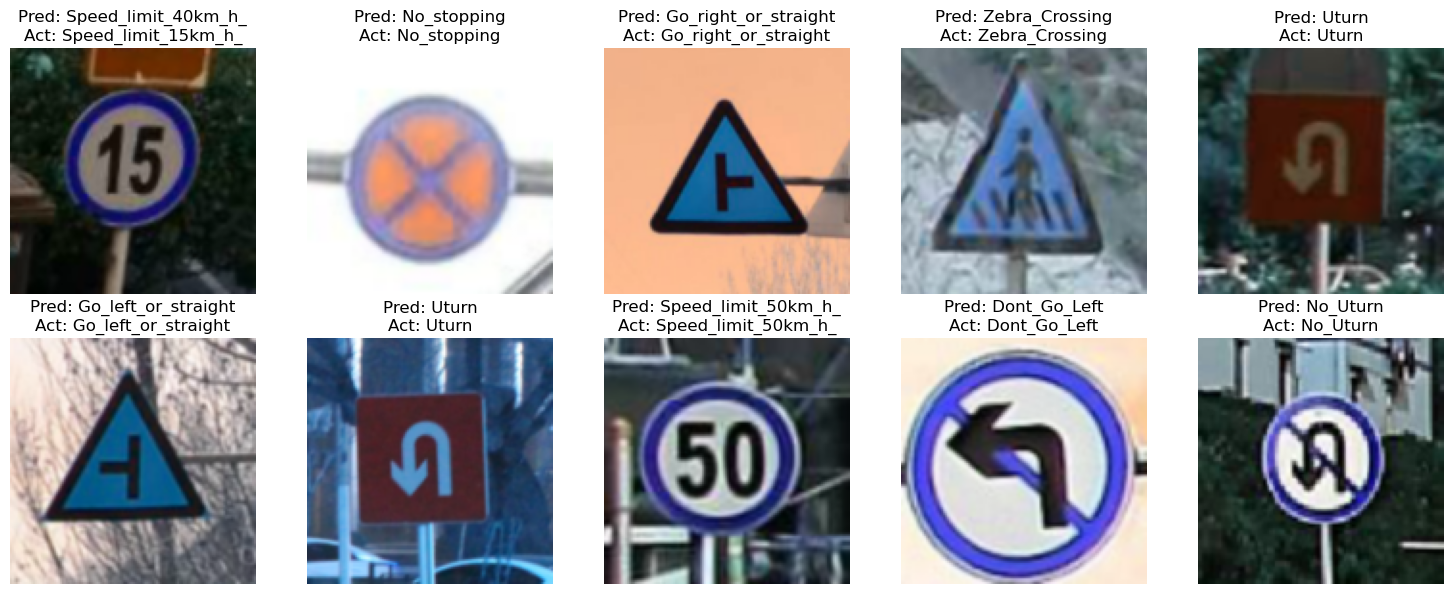

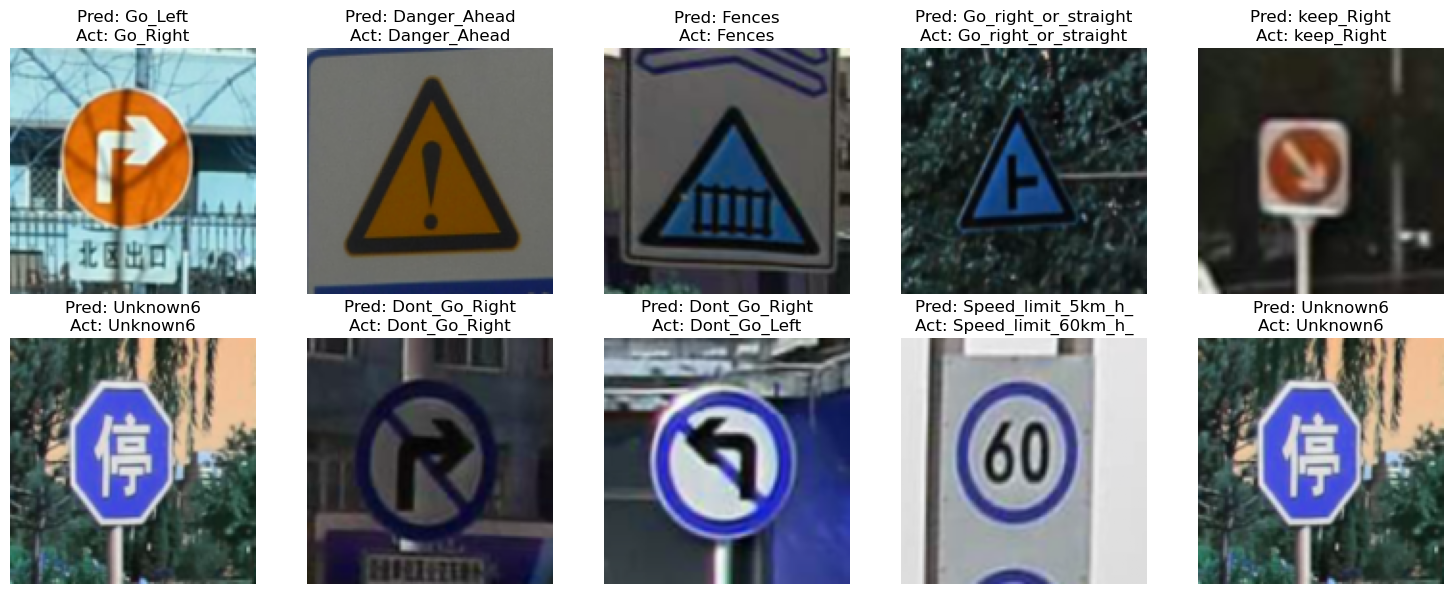

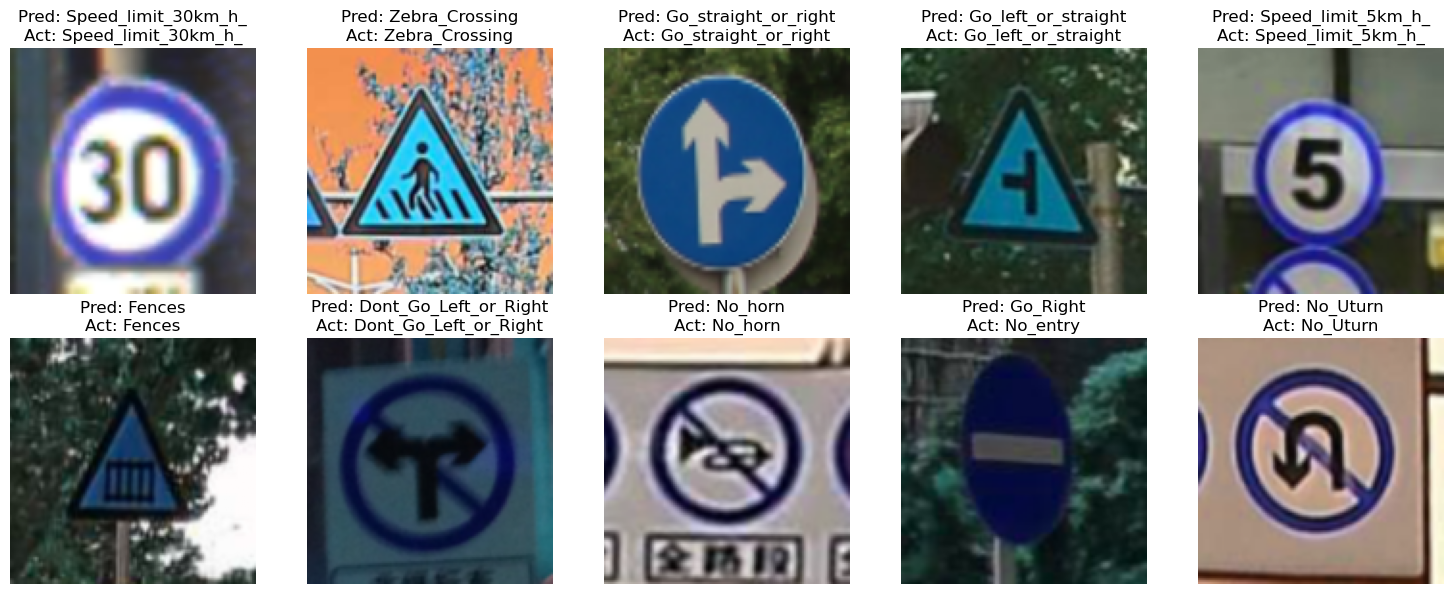

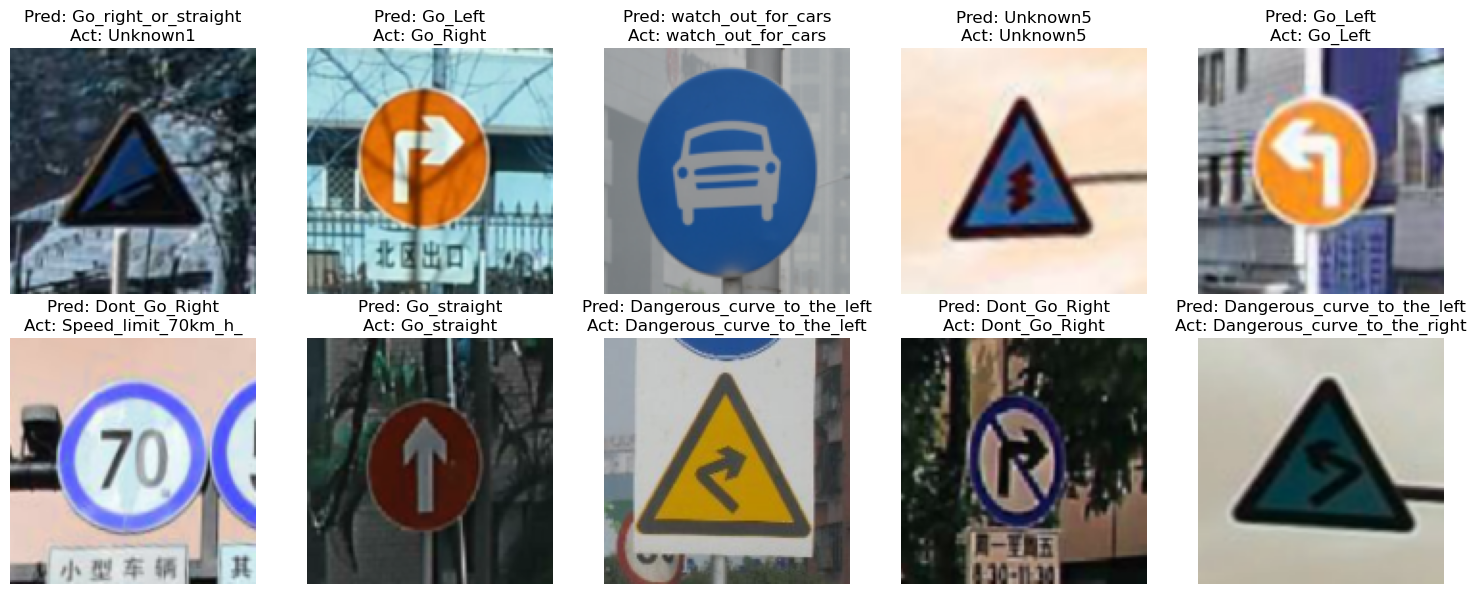

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from src.models import get_resnet18_pretrained  

# Test dataset path and device configuration
test_data_path = r"dataset/TEST"  # Path to test dataset
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define test transformations (same as used during training/validation)
test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize to match input size for the model
    transforms.ToTensor(),          # Convert PIL images to tensors
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize (same mean/std as training)
])

# Load test dataset with transformations
test_dataset = ImageFolder(root=test_data_path, transform=test_transforms)
class_names = test_dataset.classes  # Retrieve class names

# Create DataLoader for test dataset
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True)

# Load the model
def load_model(model_path, num_classes, device):
    model = get_resnet18_pretrained(num_classes=num_classes)  # Ensure this matches the architecture
    checkpoint = torch.load(model_path, map_location=device)
    
    # Load only the 'state_dict' part of the checkpoint
    model.load_state_dict(checkpoint['state_dict'])  # This ensures only the weights are loaded

    model.to(device)
    model.eval()
    return model

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model = load_model(model_path="path_to_checkpoint.pth", num_classes=len(class_names), device=device)



def test_model(model, test_loader, class_names, device, num_images_to_display=20):
    """
    Test the model and visualize predictions.

    Args:
        model (torch.nn.Module): Trained model.
        test_loader (DataLoader): DataLoader for test dataset.
        class_names (list): List of class names.
        device (torch.device): Device to run the model on.
        num_images_to_display (int): Number of test images to display.
    """
    model.eval()
    images_shown = 0
    images_per_row = 5  # Number of images per row for visualization

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predictions = outputs.argmax(dim=1)

            # Visualize images
            if images_shown < num_images_to_display:
                images_np = images.cpu().numpy()
                labels_np = labels.cpu().numpy()
                predictions_np = predictions.cpu().numpy()

                num_images = min(len(images), num_images_to_display - images_shown)
                rows = (num_images + images_per_row - 1) // images_per_row  # Calculate rows needed
                fig, axes = plt.subplots(rows, images_per_row, figsize=(15, 3 * rows))

                for i in range(num_images):
                    row, col = divmod(i, images_per_row)
                    ax = axes[row, col] if rows > 1 else axes[col]
                    image = np.transpose(images_np[i], (1, 2, 0))  # Convert (C, H, W) to (H, W, C)
                    image = (image * 0.5) + 0.5  # Unnormalize (assuming normalization with mean=0.5, std=0.5)
                    ax.imshow(image)
                    ax.set_title(f"Pred: {class_names[predictions_np[i]]}\nAct: {class_names[labels_np[i]]}")
                    ax.axis('off')

                # Turn off unused subplots
                for j in range(num_images, rows * images_per_row):
                    row, col = divmod(j, images_per_row)
                    ax = axes[row, col] if rows > 1 else axes[col]
                    ax.axis('off')

                plt.tight_layout()
                plt.show()

                images_shown += num_images
                if images_shown >= num_images_to_display:
                    break


# Paths and Configurations
model_path = r"C:\Users\Lenovo\Desktop\AI_Project\checkpoints\resnet18_pretrained_cel.pth"  # Path to your saved .pth file
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
model = load_model(model_path, num_classes=len(class_names), device=device)

# Test and visualize predictions
test_model(model, test_loader, class_names, device, num_images_to_display=80)


In [1]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\AI_Project\dataset\labels.csv")
df

ClassId                          Name
0         0           Speed limit (5km/h)
1         1          Speed limit (15km/h)
2         2          Speed limit (30km/h)
3         3          Speed limit (40km/h)
4         4          Speed limit (50km/h)
5         5          Speed limit (60km/h)
6         6          Speed limit (70km/h)
7         7          speed limit (80km/h)
8         8      Dont Go straight or left
9         9                      Unknown7
10       10              Dont Go straight
11       11                  Dont Go Left
12       12         Dont Go Left or Right
13       13                 Dont Go Right
14       14       Dont overtake from Left
15       15                      No Uturn
16       16                        No Car
17       17                       No horn
18       18                      No entry
19       19                   No stopping
20       20          Go straight or right
21       21                   Go straight
22       22                       Go Left
23       23              Go Left or right
24       24                      Go Right
25       25                     keep Left
26       26                    keep Right
27       27          Roundabout mandatory
28       28            watch out for cars
29       29                          Horn
30       30             Bicycles crossing
31       31                         Uturn
32       32                  Road Divider
33       33                      Unknown6
34       34                  Danger Ahead
35       35                Zebra Crossing
36       36             Bicycles crossing
37       37             Children crossing
38       38   Dangerous curve to the left
39       39  Dangerous curve to the right
40       40                      Unknown1
41       41                      Unknown2
42       42                      Unknown3
43       43          Go right or straight
44       44           Go left or straight
45       45                      Unknown4
46       46                  ZigZag Curve
47       47                Train Crossing
48       48            Under Construction
49       49                      Unknown5
50       50                        Fences
51       51       Heavy Vehicle Accidents

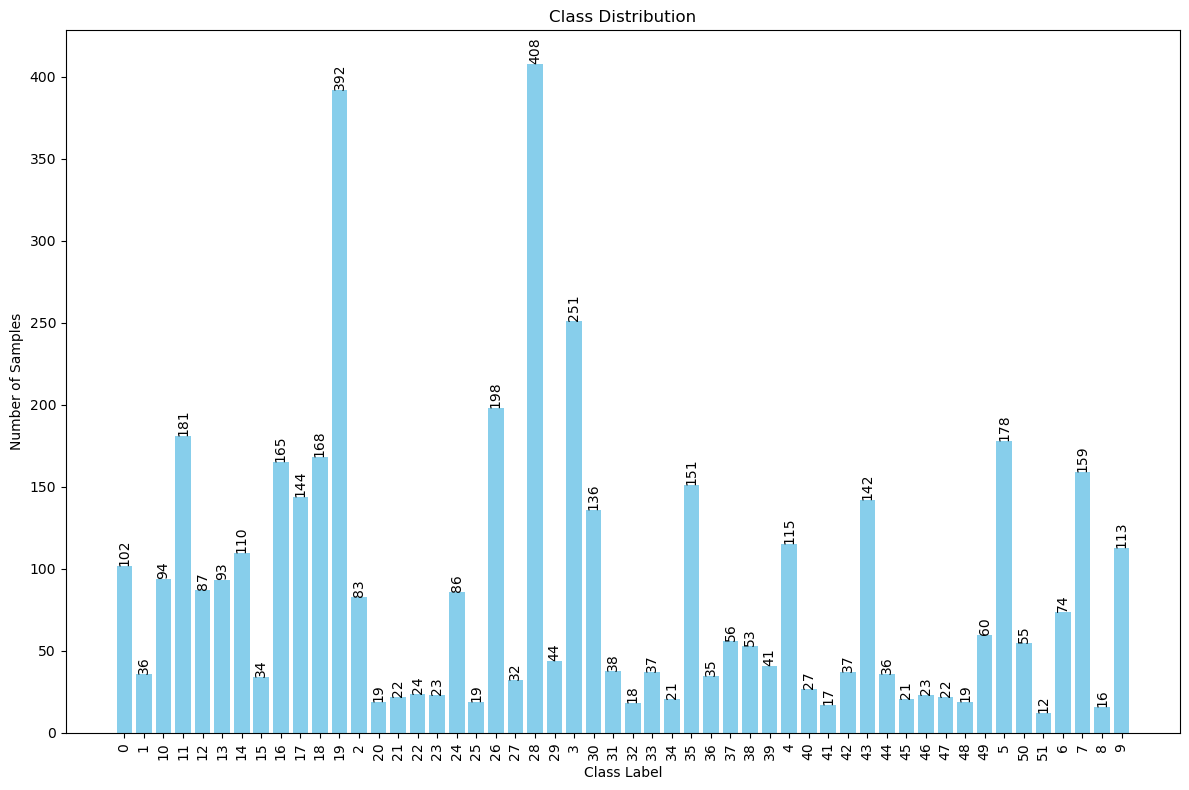

In [42]:
import os
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from collections import Counter

# Set up dataset and transform (ImageFolder example)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load your dataset (adjust the path as needed)
dataset = datasets.ImageFolder(root=r'new_data/train', transform=transform)

# Get class labels
class_labels = dataset.targets  # `targets` contains the class indices for each image

# Count the number of samples per class
class_counts = Counter(class_labels)

# Get class names (from ImageFolder, it's based on subdirectory names)
class_names = dataset.classes

# Plot class distribution
plt.figure(figsize=(12, 8))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=90)  # Use class names on x-axis

# Add counts vertically above the bars
for bar in bars:
    yval = bar.get_height()
    # Place text vertically above each bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=10, rotation=90)

plt.tight_layout()  # To prevent clipping of labels
plt.show()


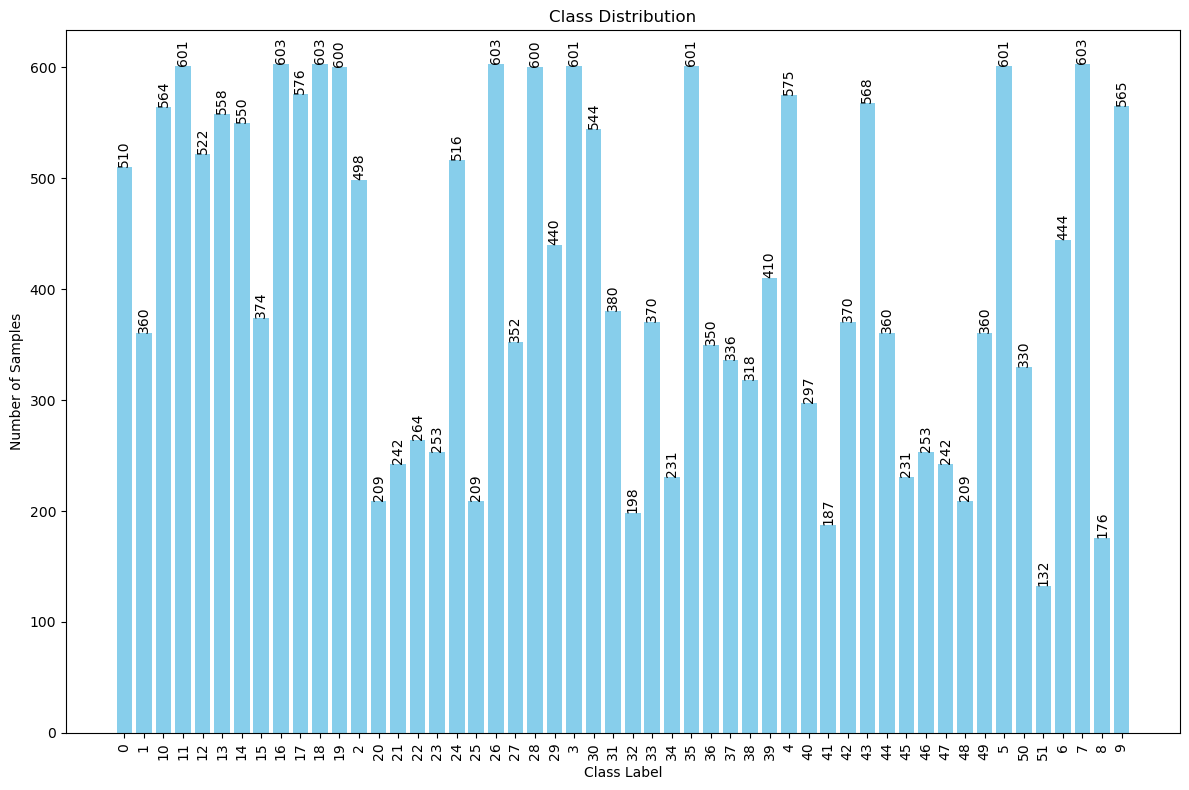

In [3]:
import os
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from collections import Counter

# Set up dataset and transform (ImageFolder example)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load your dataset (adjust the path as needed)
dataset = datasets.ImageFolder(root=r'balanced_data/train', transform=transform)

# Get class labels
class_labels = dataset.targets  # `targets` contains the class indices for each image

# Count the number of samples per class
class_counts = Counter(class_labels)

# Get class names (from ImageFolder, it's based on subdirectory names)
class_names = dataset.classes

# Plot class distribution
plt.figure(figsize=(12, 8))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=90)  # Use class names on x-axis

# Add counts vertically above the bars
for bar in bars:
    yval = bar.get_height()
    # Place text vertically above each bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=10, rotation=90)

plt.tight_layout()  # To prevent clipping of labels
plt.show()


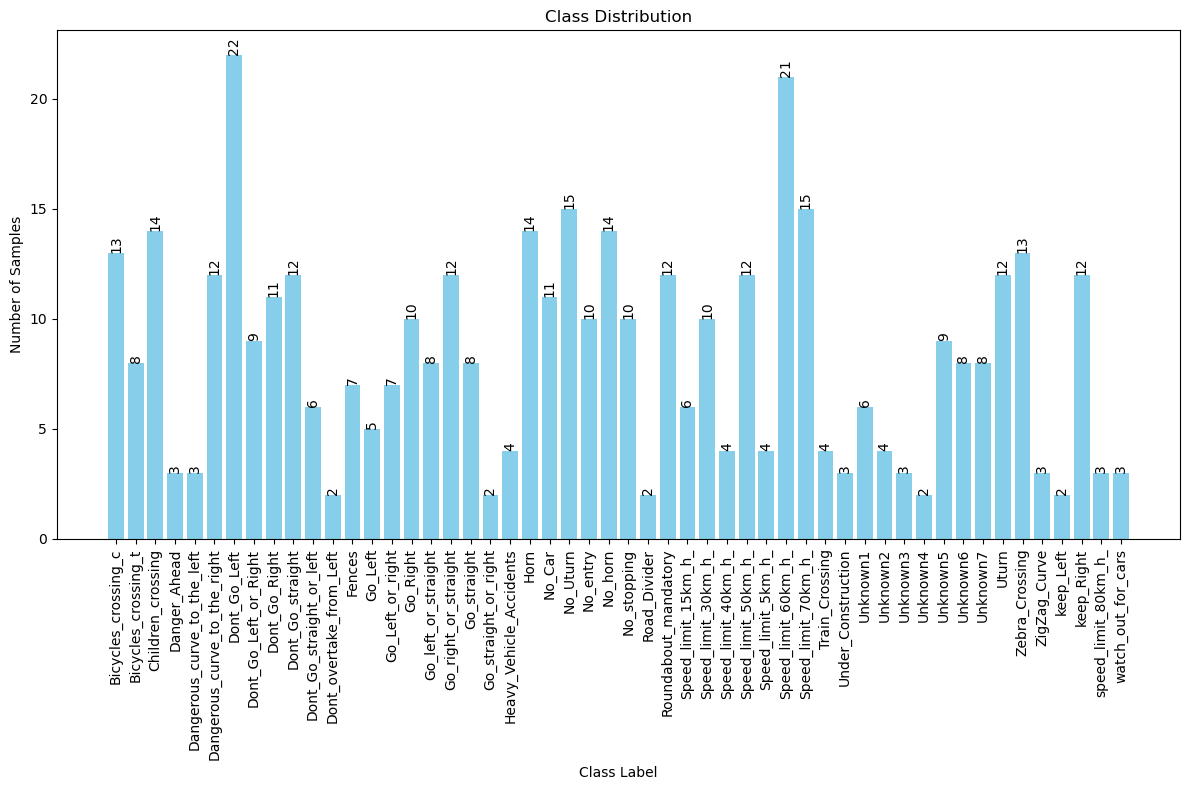

In [1]:
import os
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from collections import Counter

# Set up dataset and transform (ImageFolder example)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load your dataset (adjust the path as needed)
dataset = datasets.ImageFolder(root=r'dataset/TEST', transform=transform)

# Get class labels
class_labels = dataset.targets  # `targets` contains the class indices for each image

# Count the number of samples per class
class_counts = Counter(class_labels)

# Get class names (from ImageFolder, it's based on subdirectory names)
class_names = dataset.classes

# Plot class distribution
plt.figure(figsize=(12, 8))
bars = plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=90)  # Use class names on x-axis

# Add counts vertically above the bars
for bar in bars:
    yval = bar.get_height()
    # Place text vertically above each bar
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center', fontsize=10, rotation=90)

plt.tight_layout()  # To prevent clipping of labels
plt.show()
